In [1]:
# Setup
import os, sys

root_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(root_dir)

import models as M
import utils


In [2]:
EPOCH = 30
BATCH = 128

DATADIR = "/Users/mghifary/Work/Code/AI/data"
MODELDIR = "/Users/mghifary/Work/Code/AI/models"

### Load VAE model

In [3]:
latent_dim = 2
encoder = M.create_conv_encoder(input_shape=(28, 28, 1), latent_dim=latent_dim)
decoder = M.create_conv_decoder(latent_dim=latent_dim)
model = M.VAE(encoder, decoder)
model.build(input_shape=(None, 28, 28, 1))
model.summary()

Model: "vae"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder (Functional)        [(None, 2),               69076     
                              (None, 2),                         
                              (None, 2)]                         
                                                                 
 decoder (Functional)        (None, 28, 28, 1)         65089     
                                                                 
Total params: 134171 (524.11 KB)
Trainable params: 134165 (524.08 KB)
Non-trainable params: 6 (24.00 Byte)
_________________________________________________________________


In [4]:

modelpath = os.path.join(MODELDIR, "vae-conv_mnist.h5")
model.load_weights(modelpath, skip_mismatch=False, by_name=False, options=None)

1/1 [==============================] - 0s 9ms/step


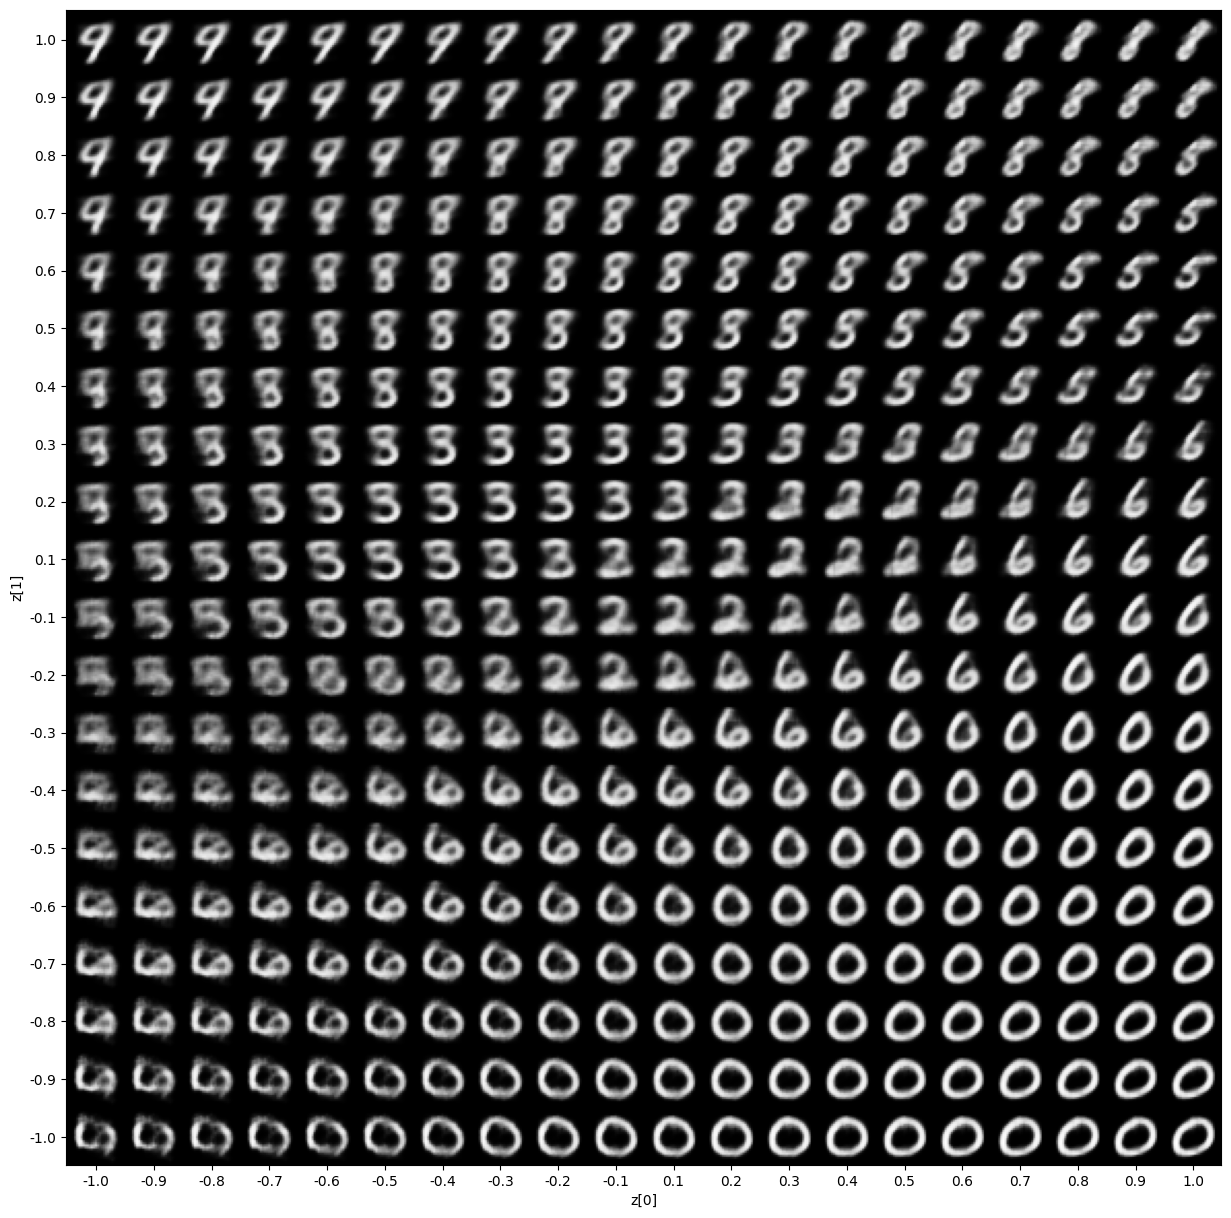

In [5]:
utils.plot_latent_space(model, n=20, figsize=15)